# Pregunta 4
## Alejandro Villazón G.

Importamos las librerías necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creamos una clase `Interruptor` que tiene como métodos `verificar_vida`, `aplicar_dano`, `cant_fallos`, entre otras.

In [2]:
class Interruptor:
    def __init__(self):
        self.dano = np.zeros(5) 
        self.dano_historial = []

    def verificar_vida(self):
        return not all(self.dano > 100)

    def aplicar_dano(self, retornar = False, verbose = True):
        if not self.verificar_vida():
            if verbose:
                print("Todas las componentes están muertas. No se puede aplicar más daño.")
            return None
        
        alpha = np.random.uniform(0.75, 1.5)
        beta  = np.random.uniform(2.75, 3.25)
        dano  = 10 * np.random.beta(alpha, beta)
        
        comp_danables  = np.where(self.dano < 100)[0]  # índices
        n_comp_a_danar = np.random.randint(1, len(comp_danables)+1)
        
        comp_a_danar = np.argsort(self.dano[comp_danables])[:n_comp_a_danar]
        
        # calculamos y guardamos los daños a cada componente en esta falla
        aux_danos = np.zeros(5)
        aux_danos[comp_danables[comp_a_danar]] += dano/n_comp_a_danar
        self.dano_historial.append(aux_danos)
        
        # actualizamos daños a componentes en esta falla
        self.dano += aux_danos
        
        if any(self.dano > 100) and verbose:
            print(f'Hay {len(np.where(self.dano > 100)[0])} componente(s) muerta(s).')
        
        return self.dano_historial if retornar else None 
        
    def mostrar_dano(self):
        print(f'Daño a las componentes: {self.dano}')
        
    def mostrar_vida(self):
        print(f'Vida de las componentes: {100-self.dano}')
        
    def cant_fallos(self):
        (
            print(f'El equipo lleva {len(self.dano_historial)} fallos, continúa operativo.')
            if self.verificar_vida() else 
            print(f'El equipo soportó {len(self.dano_historial)} fallos, se encuentra inoperativo.') 
        )

Iniciamos un Interruptor y mostramos su vida.

In [3]:
interruptor = Interruptor()

interruptor.mostrar_vida()

Vida de las componentes: [100. 100. 100. 100. 100.]


In [4]:
interruptor.verificar_vida()

True

In [5]:
interruptor.cant_fallos()

El equipo lleva 0 fallos, continúa operativo.


Aplicamos daño hasta que el Interruptor quede inoperativo

In [6]:
%%time
while interruptor.verificar_vida():
    interruptor.aplicar_dano()
interruptor.cant_fallos()
interruptor.mostrar_dano()
interruptor.mostrar_vida()

Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 2 componente(s) muerta(s).
Hay 3 componente(s) muerta(s).
Hay 5 componente(s) muerta(s).
El equipo soportó 178 fallos, se encuentra inoperativo.
Daño a las componentes: [105.0506837  100.34044589 102.63688166 100.6049148  100.68015035]
Vida de las componentes: [-5.0506837  -0.34044589 -2.63688166 -0.6049148  -0.68015035]
CPU times: total: 31.2 ms
Wall time: 11.1 ms


In [7]:
interruptor.aplicar_dano()

Todas las componentes están muertas. No se puede aplicar más daño.


Realicemos algunos gráficos de interés.

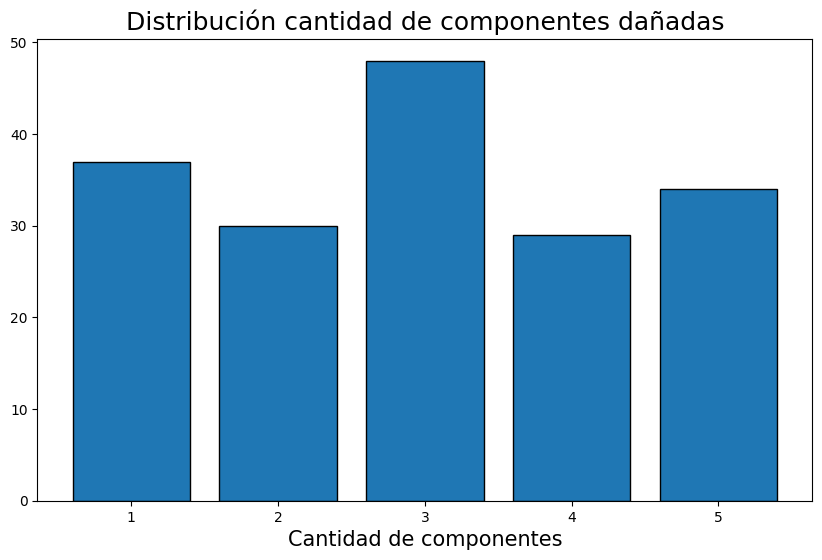

In [8]:
x, y = np.unique((np.array(interruptor.dano_historial)>0).sum(axis=1), return_counts=True)
plt.figure(figsize=(10,6))
plt.bar(x,y, edgecolor='k')
plt.title('Distribución cantidad de componentes dañadas', size=18)
plt.xlabel('Cantidad de componentes', size=15)
path = 'C:/Users/Aleja/OneDrive - Universidad Técnica Federico Santa María/Material universidad/10sem 2023-2/MAT468/MAT468_github/certamen/P4/'
plt.savefig(path+'P4_distr_cant_comp_danadas.png');

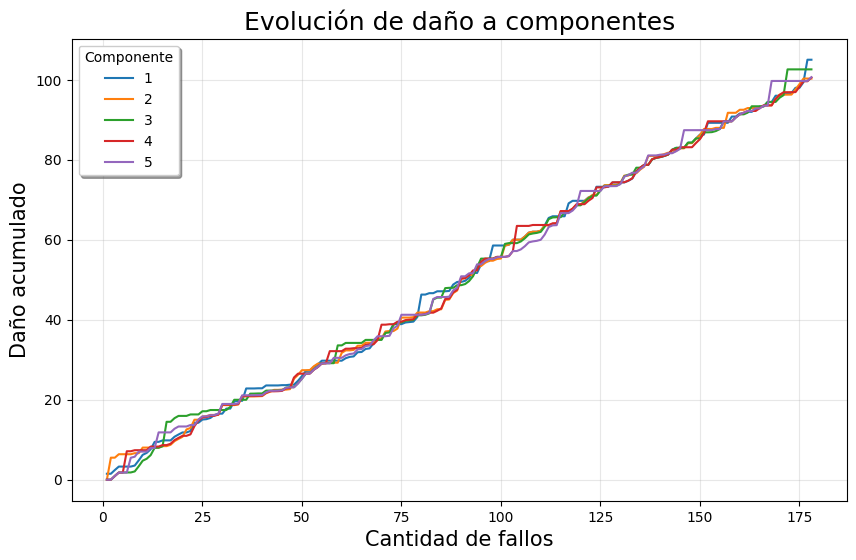

In [9]:
historial = np.array(interruptor.dano_historial)

plt.figure(figsize=(10,6))
for comp in range(1,5+1):
    plt.plot(np.arange(1,historial.shape[0]+1), np.cumsum(historial[:,comp-1]),
             label=f'{comp}')
plt.title('Evolución de daño a componentes', size=18)
plt.xlabel('Cantidad de fallos', size=15); plt.ylabel('Daño acumulado', size=15)
plt.grid(alpha=0.3)
plt.legend(title='Componente', shadow=True)
plt.savefig(path+'P4_evol_danos_comp.png');

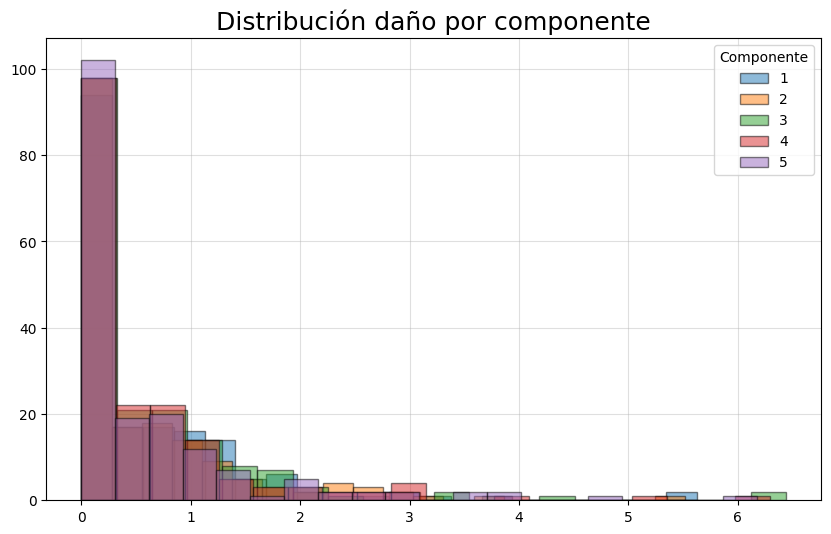

In [10]:
plt.figure(figsize=(10,6))
for comp in range(5):
    plt.hist(np.array(interruptor.dano_historial)[:,comp], label=f'{comp+1}',
             bins=20, alpha=0.5, edgecolor='k', zorder=2)
plt.legend(title='Componente')
plt.title('Distribución daño por componente', size=18)
plt.grid(alpha=0.4, zorder=1)
plt.savefig(path+'P4_distr_danos_comp.png');

Se propone la distribución Exponencial como tiempo entre fallas.

In [11]:
f = lambda x, lamb: np.exp(- x / lamb) / lamb

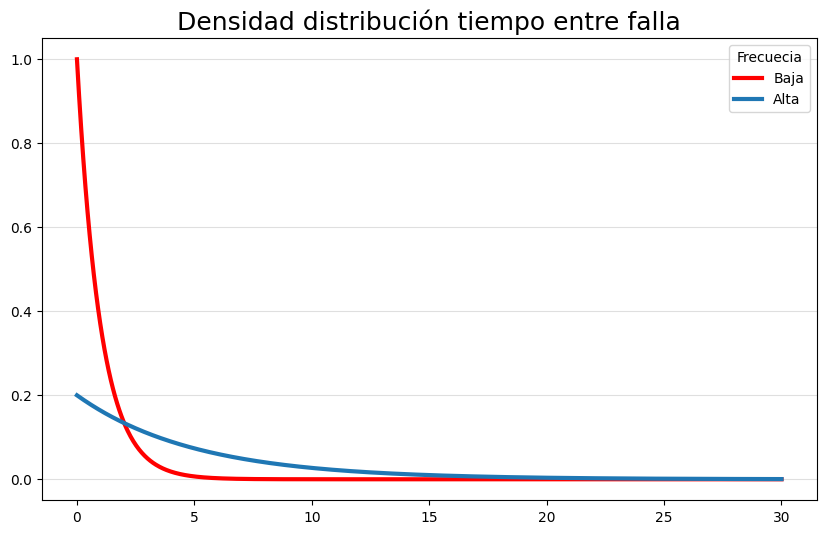

In [12]:
x = np.linspace(0,30,1_000)

lamb_alta = 5
lamb_baja = 1

plt.figure(figsize=(10,6))
plt.plot(x, f(x, lamb_baja), lw=3, c='r', label='Baja')
plt.plot(x, f(x, lamb_alta), lw=3, label='Alta')
plt.legend(title='Frecuecia')
plt.grid(axis='y', alpha=0.4)
plt.title('Densidad distribución tiempo entre falla', size = 18);

Hacemos simulaciones hasta dejar inoperativo distintos Interruptores, guardando el tiempo de vida y la cantidad de fallos necesarios para quedar inactivos, esto para cada frecuencia, de forma independiente.

In [13]:
cant_interruptores = 10_000

tiempo_esperados_baja = []
cant_fallos_baja = []
for _ in range(cant_interruptores):
    interruptor = Interruptor()
    tiempo_esperado = 0
    while interruptor.verificar_vida():
        tiempo_esperado += np.random.exponential(lamb_baja)
        interruptor.aplicar_dano(verbose=False)
    cant_fallos_baja.append(np.array(interruptor.dano_historial).shape[0])
    tiempo_esperados_baja.append(tiempo_esperado)

In [14]:
tiempo_esperados_alta = []
cant_fallos_alta = []
for _ in range(cant_interruptores):
    interruptor = Interruptor()
    tiempo_esperado = 0
    while interruptor.verificar_vida():
        tiempo_esperado += np.random.exponential(lamb_alta)
        interruptor.aplicar_dano(verbose=False)
    cant_fallos_alta.append(np.array(interruptor.dano_historial).shape[0])
    tiempo_esperados_alta.append(tiempo_esperado)

Gráficamos las distribuciones correspondientes.

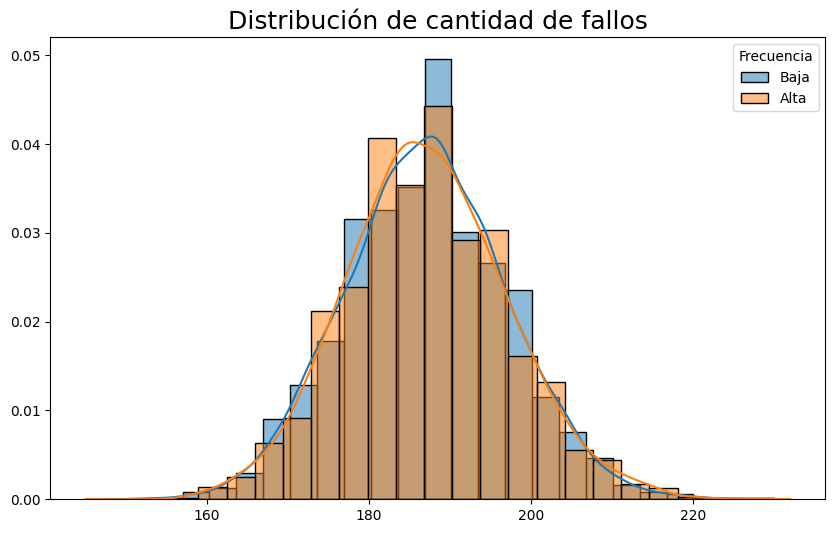

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(cant_fallos_baja, stat='density', bins=25, kde=True, label='Baja')
sns.histplot(cant_fallos_alta, stat='density', bins=25, kde=True, label='Alta')
plt.legend(title='Frecuencia'); plt.ylabel('')
plt.title('Distribución de cantidad de fallos', size=18)
plt.savefig(path+'P4_distr_cant_fallos.png');

Cantidad de fallas esperadas hasta quedar inoperativo:

In [16]:
# Freq baja
np.mean(cant_fallos_baja)

187.0259

In [17]:
# Freq alta
np.mean(cant_fallos_alta)

187.0766

Como era de esperar la cantidad de fallos es independiente de la frecuecia de fallos.

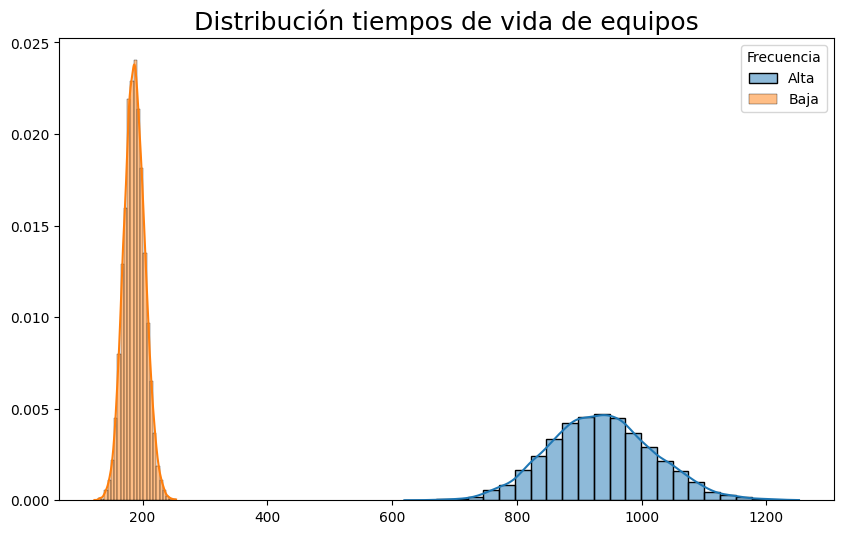

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(tiempo_esperados_alta, stat='density', bins=25, kde=True, label='Alta')
sns.histplot(tiempo_esperados_baja, stat='density', bins=25, kde=True, label='Baja')
plt.legend(title='Frecuencia'); plt.ylabel('')
plt.title('Distribución tiempos de vida de equipos', size=18)
plt.savefig(path+'P4_distr_tiempos_esp.png');

Tiempos esperados para declarar inoperativo el equipo según su tráfico:

In [19]:
# Freq baja
np.mean(tiempo_esperados_baja)

187.01191134922882

In [20]:
# Freq alta
np.mean(tiempo_esperados_alta)

935.6135794954208

Note que el tiempo esperado tiene directa relación con la cantidad de fallas:

In [21]:
# Freq baja
np.mean(cant_fallos_baja) * lamb_baja, np.mean(tiempo_esperados_baja)

(187.0259, 187.01191134922882)

In [22]:
# Freq alta
np.mean(cant_fallos_alta) * lamb_alta, np.mean(tiempo_esperados_alta)

(935.383, 935.6135794954208)

Generamos un sistema de interruptores con cantidad a definir y analizamos los tiempos esperados de vida del sistema con más de un interruptor vs un solo equipo.

In [23]:
cant_interruptores_en_paralelo = 10
cant_sistemas = 1_000

cant_fallos_alta_sistemas=[]
tiempo_esperados_alta_sistemas=[]

for _ in range(cant_sistemas):
    interruptores = [Interruptor() for _ in range(cant_interruptores_en_paralelo)]
    tiempo_esperado = 0
    cant_fallos = 0
    while any([interruptor.verificar_vida() for interruptor in interruptores]):
        tiempo_esperado += np.random.exponential(lamb_alta)
        for interruptor in interruptores:    
            interruptor.aplicar_dano(verbose=False)
        cant_fallos+=1
    cant_fallos_alta_sistemas.append(cant_fallos)
    tiempo_esperados_alta_sistemas.append(tiempo_esperado)

In [24]:
cant_fallos_baja_sistemas=[]
tiempo_esperados_baja_sistemas=[]

for _ in range(cant_sistemas):
    interruptores = [Interruptor() for _ in range(cant_interruptores_en_paralelo)]
    tiempo_esperado = 0
    cant_fallos = 0
    while any([interruptor.verificar_vida() for interruptor in interruptores]):
        tiempo_esperado += np.random.exponential(lamb_baja)
        for interruptor in interruptores:    
            interruptor.aplicar_dano(verbose=False)
        cant_fallos+=1
    cant_fallos_baja_sistemas.append(cant_fallos)
    tiempo_esperados_baja_sistemas.append(tiempo_esperado)

Comparamos el histograma de los tiempos esperados en declarar inoperativo un sistema de interruptores versus un solo interruptor para ambas frecuencias.

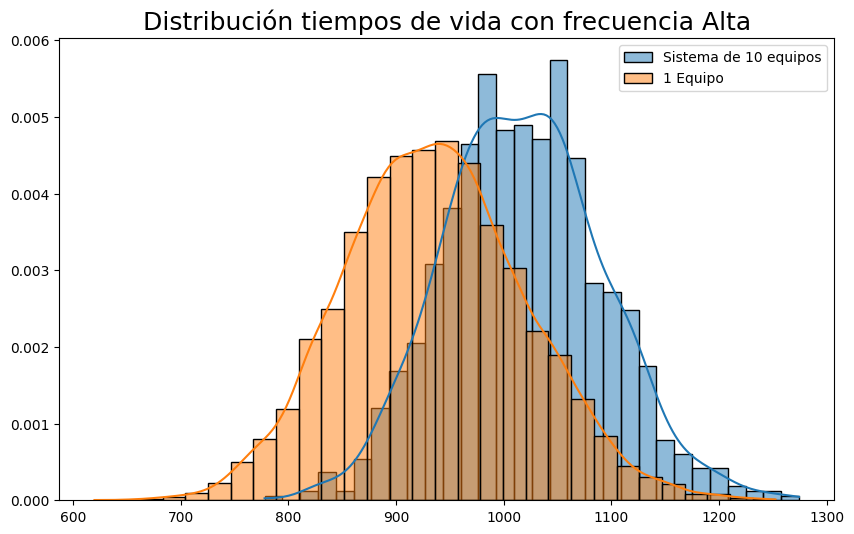

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(tiempo_esperados_alta_sistemas, stat='density', bins=30, kde=True, label=f'Sistema de {cant_interruptores_en_paralelo} equipos')
sns.histplot(tiempo_esperados_alta, stat='density', bins=30, kde=True, label='1 Equipo')
plt.legend(); plt.ylabel('')
plt.title('Distribución tiempos de vida con frecuencia Alta', size=18)
plt.savefig(path+'P4d_distr_tiempos_vs_alta.png');

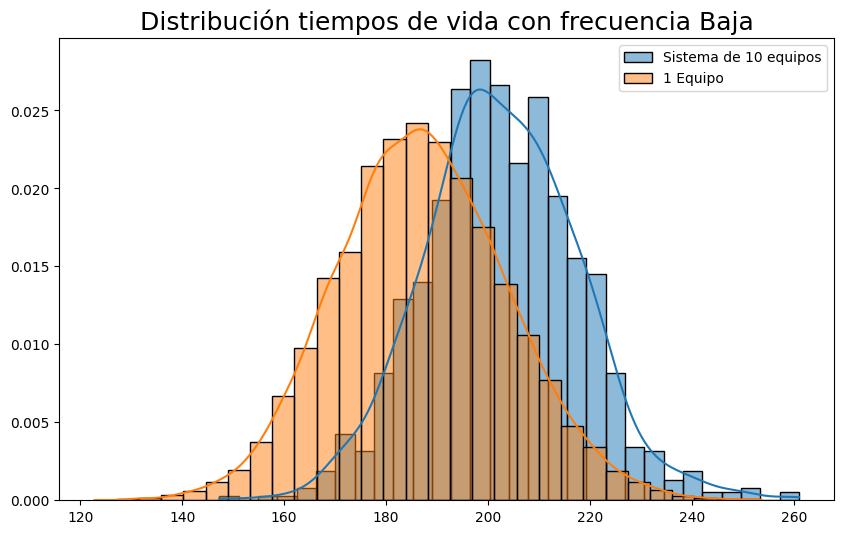

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(tiempo_esperados_baja_sistemas, stat='density', bins=30, kde=True, label=f'Sistema de {cant_interruptores_en_paralelo} equipos')
sns.histplot(tiempo_esperados_baja, stat='density', bins=30, kde=True, label='1 Equipo')
plt.legend(); plt.ylabel('')
plt.title('Distribución tiempos de vida con frecuencia Baja', size=18)
plt.savefig(path+'P4d_distr_tiempos_vs_baja.png');

Comparamos las medias en cada caso.

In [27]:
# Freq baja
np.mean(tiempo_esperados_baja), np.mean(tiempo_esperados_baja_sistemas)

(187.01191134922882, 202.6413163432352)

In [28]:
# Freq alta
np.mean(tiempo_esperados_alta), np.mean(tiempo_esperados_alta_sistemas)

(935.6135794954208, 1018.2356475202732)